# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 2. Методы нахождения оценок
### Дедлайн --- 16 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [1]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Downloading...
From: https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
To: /Users/avborovets/Desktop/PROGA/Statistics/Statistics/Cauchy.csv
100%|██████████████████████████████████████| 18.7k/18.7k [00:00<00:00, 16.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: /Users/avborovets/Desktop/PROGA/Statistics/Statistics/Weibull.csv
100%|██████████████████████████████████████| 17.9k/17.9k [00:00<00:00, 13.6MB/s]


In [2]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

## Задача 1

На высоте 1 метр от поверхности Земли закреплено устройство,
которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ —
перпендикуляр к поверхности Земли, опущенный из точки, в которой
закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного
распределения на отрезке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения
с поверхностью имеют распределение Коши с плотностью $p(x) =
\frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$
соответствует проекции точки расположения устройства на поверхность
Земли (направление оси и начало координат на поверхности Земли
выбраны заранее некоторым образом независимо от расположения
устройства). В файле `Cauchy.csv` находятся координаты точек
пересечения лучей с поверхностью Земли.

In [3]:
cauchy_sample = pd.read_csv("Cauchy.csv")["sample"].values

 Оцените параметр сдвига
методом максимального правдоподобия 
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор
точек с некоторым шагом и верните ту, на которой достигается
максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Интервал можете итеративно уменьшать, но не стоит делать его длину меньше 50.


In [4]:
left_bound = 210 - 25
right_bound = 210 + 25

In [5]:
def f_caushy_pdf(sample, k, x_0):
    return np.prod(k / (np.pi * (1 + (sample - x_0) ** 2)))

In [6]:
def maximum_likelihood_method(density, sample, left_bound, right_bound, k=10, cnt=100):
    range_values_x0 = np.linspace(left_bound, right_bound, cnt)
    array = np.array([density(sample, k, x_0) for x_0 in range_values_x0])
    x_0 = range_values_x0[np.argmax(array)]
    return x_0  

In [7]:
# YOUR_CODE_GOES_HERE

n_elem = [10, 100, len(cauchy_sample)]

for n in n_elem:
    print(maximum_likelihood_method(f_caushy_pdf, cauchy_sample[:n], left_bound, right_bound))


208.73737373737373
207.72727272727272
207.72727272727272


Сравните полученные результаты с `sps.cauchy.fit`

In [8]:
for n in n_elem:
    print(sps.cauchy.fit(cauchy_sample[:n])[0])

208.50577017532487
207.87882548487846
207.97772827944334


Получаем, что $x_0 = 207.978 \pm 0.001$. Также не трудно заметить, чем больше выборка, тем точнее истинное значение, но для этого пришлось поподбирать значение коэффициента $k$, который нужен для того, чтобы проводить операции с не очень маленькими и не очень большими значениями (для того, чтобы точность не уменьшалась).

## Задача 2
В банкомате "Тинькофф" в Новом Корпусе МФТИ каждую минуту подсчитывается баланс по
сравнению с началом дня (6 часов утра). В полночь работники банка
измеряют две величины: $X^1$ – максимальное значение баланса за
день, $X^2$ – значение баланса в полночь. Считается, что величина
$X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В течение 10 лет каждый день банк проводил
измерение величины $X,$ получив в результате выборку $X_1, \ldots,
X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения.

In [9]:
weibull_sample = np.loadtxt("Weibull.csv")

Постройте гистограмму выборки. Не забудьте подобрать `xlim`, `ylim` и параметр `bins`, чтобы гистограмма была информативна

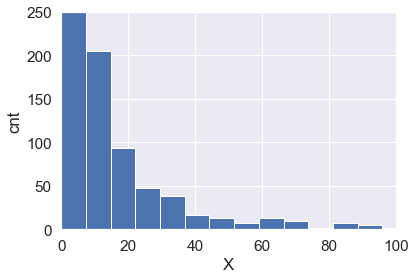

In [10]:
# YOUR_CODE_GOES_HERE

# plt.figure(figsize=(10, 10))

plt.hist(
    weibull_sample,
    bins=50
)

plt.xlabel('X')
plt.ylabel('cnt')

plt.xlim(0, 100)
plt.ylim(0, 250)

plt.show()

Видно, что гистограмма напоманиет график, убывающий по экспоненте (оно и не удивительно ведь плотность $\rho = \gamma x^{\gamma - 1} \exp^{-x^{\gamma}}$).

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$


Однако здесь мы сталкиваемся с проблемой: в нашей выборке есть нули. А логарифм нуля, как известно, не определен. Мы предлагаем вам сравнить два способа рещения этой проблемы:

1. Отбросить нули до построения эмпирической функции распределения $\hat{F}(x)$
2. Построить эмпирическую функцию, а затем учитывать только те точки, x-координата которых положительна.

Для первого способа отфильтруйте выборку в ячейке ниже

In [11]:
# YOUR_CODE_GOES_HERE

filtered_sample = np.array(list(filter(lambda x: x > 0, weibull_sample)))

Для каждого способа подсчитайте эмпирическую функцию распределения и 
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки. 

In [12]:
from statsmodels.distributions.empirical_distribution import ECDF

# YOUR_CODE_GOES_HERE

ecdf0 = ECDF(filtered_sample)
ecdf1 = ECDF(weibull_sample)

lnx = np.log(filtered_sample)

res_ecdf0 = np.array(list(map(lambda x: min(0.999, x), ecdf0(filtered_sample))))
res_ecdf1 = np.array(list(map(lambda x: min(0.999, x), ecdf1(filtered_sample))))

y0 = np.log(-np.log(1 - res_ecdf0))
y1 = np.log(-np.log(1 - res_ecdf1))


Постройте график (`plt.scatter`) для первого способа красным цветом, а для второго — синим. Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла.

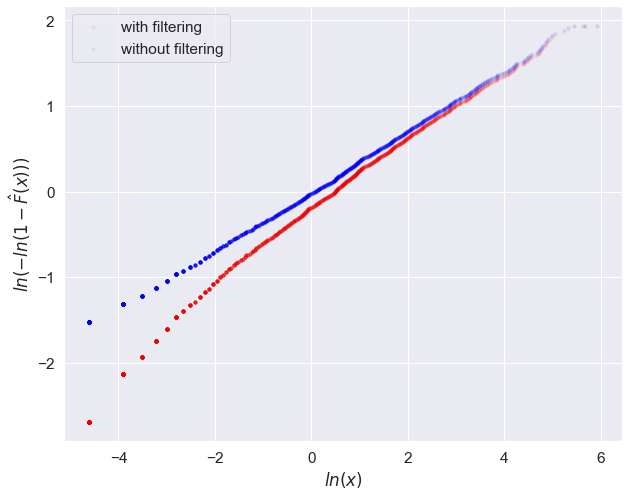

In [13]:
# YOUR_CODE_GOES_HERE

plt.figure(figsize=(10, 8))



plt.scatter(
    lnx,
    y0,
    color='red',
    alpha=0.05,
    s=10,
    label='with filtering'
)
plt.scatter(
    lnx,
    y1,
    color='blue',
    alpha=0.05,
    s=10,
    label='without filtering'
)


plt.legend()
plt.xlabel('$ln(x)$')
plt.ylabel('$ln(-ln(1 - \hat{F}(x)))$')

plt.show()

Сделайте вывод. Какой способ вам кажется более правильным и почему?

**Вывод** Зависимоть должна вида $y = kx$, значит график должен проходить через ноль. Синий график (без фильтрации) проходит через ноль, а красный (с фильтрацией) не проходит. Можно сделать вывод, что способ без фильтрации работает лучше.

Оцените параметр формы методом максимального правдоподобия 
* по
первым 4 годам; 
* по всей выборке.
Оценку произведите по сетке (в
логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

In [14]:
def f_weibull_pdf(sample, k, x_0):
    n = len(sample)
    return  np.sum((x_0 + (np.exp(x_0) - 1) * np.log(sample) - sample ** np.exp(x_0)))

In [15]:
def maximum_likelihood_method1(density, sample, left_bound, right_bound, k=10, cnt=100):
    range_values_x0 = np.linspace(left_bound, right_bound, cnt)
    array = np.array([density(sample, k, x_0) for x_0 in range_values_x0])
    x_0 = range_values_x0[np.argmax(array)]
    return x_0  

In [16]:
# YOUR_CODE_GOES_HERE
for n in [4 * 365, len(filtered_sample)]:
    lnx_0 = maximum_likelihood_method1(f_weibull_pdf, filtered_sample[0:n], -2 / np.log(10), 2 / np.log(10), 1, 4000)
    print(np.exp(lnx_0))

0.4195431223142999
0.4195431223142999


Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

In [17]:
# YOUR_CODE_GOES_HERE

sps.weibull_min.fit(filtered_sample, fscale=1, floc=0)

(0.41025390624999947, 0, 1)

Результаты совпадают с точностью до $0.01$

Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$) для того метода, который вам кажется более правильным. Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

**Вывод**

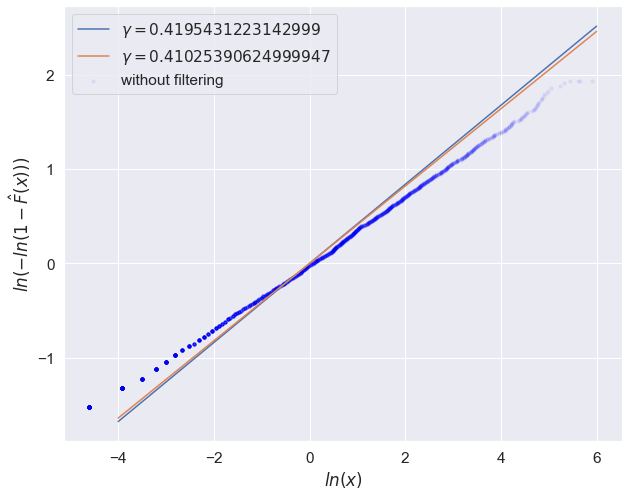

In [18]:
# YOUR_CODE_GOES_HERE

gammas = [0.4195431223142999, 0.41025390624999947]

plt.figure(figsize=(10, 8))

plt.scatter(
    lnx,
    y1,
    color='blue',
    alpha=0.05,
    s=10,
    label='without filtering'
)
x = np.linspace(-4, 6, 2)
for gamma in gammas:
    plt.plot(
        x,
        gamma * x,
        label=f'$\gamma = {gamma}$'
    )


plt.legend()
plt.xlabel('$ln(x)$')
plt.ylabel('$ln(-ln(1 - \hat{F}(x)))$')

plt.show()

Линии не очень хорошо соответствуют выборке возможно потому, что первый логарифм не точно считается
($\ln (1 - \hat{F}(x))$), так как $1 - \hat{F}(x)$ иногда принимает значения близкие к нулю, а логарифм от них будет очень большим отрицательным числом.

## Задача 3

Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Для всех $n \leq N$ посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Постройте график ошибки оценки от реального значения ($|\hat\theta - \theta|_{l_1}$) относительно размера выборки.

In [19]:
# YOUR_CODE_GOES_HERE

N = 1000
theta = 3

sample_norm = sps.norm(loc=0, scale=theta).rvs(N)
sample_uniform = sps.uniform(loc=0, scale=theta).rvs(N)
sample_gamma = sps.gamma(1, theta-1).rvs(N)

In [20]:
def method_of_moments_norm(sample):
    n = len(sample)
    mean_x = np.cumsum(sample) / (np.arange(n) + 1)
    mean_xx = np.cumsum(sample**2) / (np.arange(n) + 1)
    return mean_x, np.sqrt(mean_xx - mean_x**2)

def method_of_moments_uniform(sample):
    n = len(sample)
    mean_x = np.cumsum(sample) / (np.arange(n) + 1)
    mean_xx = np.cumsum(sample**2) / (np.arange(n) + 1)
    ss = mean_xx - mean_x**2
    return mean_x - np.sqrt(3*ss), mean_x + np.sqrt(3*ss)

def method_of_moments_gamma(sample):
    n = len(sample)
    mean_x = np.cumsum(sample) / (np.arange(n) + 1)
    mean_xx = np.cumsum(sample**2) / (np.arange(n) + 1)
    ss = mean_xx - mean_x**2
    return mean_x**2 / ss, mean_x / ss


In [21]:
sigmas = method_of_moments_norm(sample_norm)[1]
bs = method_of_moments_uniform(sample_uniform)[1]
lambdas = method_of_moments_gamma(sample_gamma)[1]
print(sigmas[-1])
print(bs[-1])
print(lambdas[-1])

2.936797303523018
2.972013967365407
3.117618798405425


/var/folders/tj/s_wg8p9j4n12qxqv9flbn1500000gn/T/ipykernel_1738/773109239.py:19: RuntimeWarning: divide by zero encountered in true_divide
  return mean_x**2 / ss, mean_x / ss


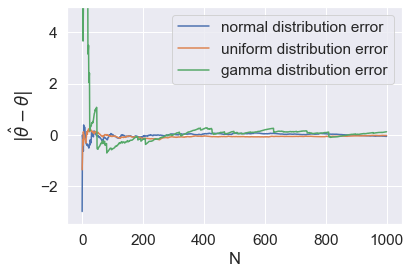

In [22]:
x = np.arange(N)

plt.plot(
    x,
    sigmas - theta,
    label='normal distribution error'
)
plt.plot(
    x,
    bs - theta,
    label='uniform distribution error'
)
plt.plot(
    x,
    lambdas - theta,
    label='gamma distribution error'
)

plt.legend()
plt.ylim(-3.5, 5)
plt.xlabel('N')
plt.ylabel('$|\hat{\\theta} - \\theta|$')

plt.show()

Нетрудно заметить, что ошибка нормального распределения убывает быстрее всех, затем идет ошибка равномерного распределения, а потом только оценка гамма распределения.

### Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка). На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Давайте возьмем нашу выборку размера $N$ и сгенерируем из нее еще $K$ выборок. Более формально для каждой бутстрепной выборки N раз будем выбирать элементы из исходной выборки с возвращением. Полученная таким образом выборка будет содержать $\approx 63$% уникальных элементов, но это не страшно. Для всех $K$ выборок посчитаем оценку $\hat\theta$. Таким образом мы получим $K$ оценок параметра. Можно показать, что если размер бутстрепных выборок и исходной совпадают, то оценка дисперсии $s^2(\hat\theta)$, полученная из $K$ оценок, будет *хорошей*.

Для каждого распределения из предыдущего пункта (Пожалуйста, не пишите цикл по распределениям. Сделайте три отдельные ячейки) для каждого $K$ из `[10] + [50] + list(range(100, 1001, 100))` сгенерируйте K бутстрепных выборок и посчитайте дисперсию бутстрепных оценок и посчитайте среднее по K выборкам. Размер бутстрепной выборки сделайте равным $K$, незабудьте уменьшить размер исходной выборки до $K$. Постройте график следующим образом: по оси $x$ отложите значения $K$, красной линией обозначьте среднее значение $\hat\theta$ бутстрепных выборок для каждого $K$. Посчитайте стандартное отклонение оценки для каждого $K$ и закрасьте интервал $\mu(k) \pm \sigma(\hat\theta)$ (`plt.fillbetween`).



In [23]:
# YOUR_CODE_GOES_HERE

K = [10] + [20] + list(range(100, 1001, 100))
K

[10, 20, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [24]:
import random
 
 
# Выборка с заменой
list = [1, 2, 3, 4, 5, 6]
sampling = random.choices(list, k=3)
 
print("Выборка с методом choices ", sampling)

Выборка с методом choices  [1, 5, 5]


In [25]:
def butstrF(sample, method):
    mean_estimations = []
    variances = []

    for k in K:
        butstr_sample = np.array([random.choices(sample[:k], k=k) for i in range(k)])
        estimations = np.array([method(butstr_sample[i])[1][-1] for i in range(k)])
        mean_estimation = np.mean(estimations)
        mean_estimation2 = np.mean(estimations ** 2)
        variance2 = mean_estimation2 - mean_estimation**2
        variance = np.sqrt(variance2 if variance2 > 0 else 0)
        mean_estimations.append(mean_estimation)
        variances.append(variance)

    mean_estimations = np.array(mean_estimations)
    variances = np.array(variances)
    return mean_estimations, variances

In [26]:
def f(mean, variances, label):
    plt.figure(figsize=(10, 5))
    plt.plot(
        K, 
        mean, 
        color='red', 
        linewidth=2.5, 
        label=label
    ) 
    plt.fill_between(
        x=K, 
        y1=mean + variances,
        y2=mean - variances,
        alpha=0.15
    )
    plt.ylim(2, 4)
    plt.xlabel('K')
    plt.legend()
    plt.show()

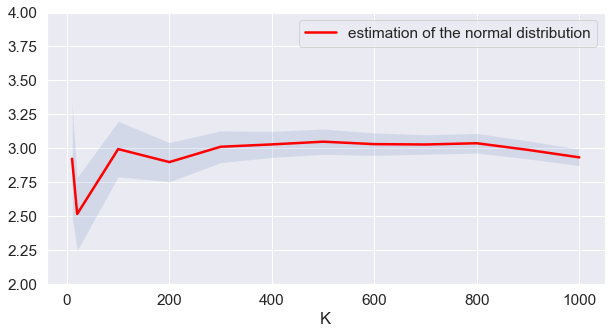

In [30]:
means, variances = butstrF(sample_norm, method_of_moments_norm)
f(means, variances, 'estimation of the normal distribution')

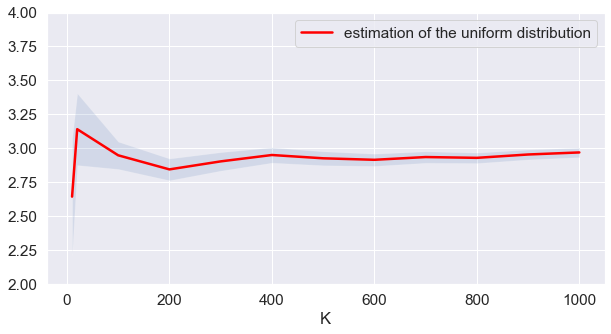

In [31]:
means, variances = butstrF(sample_uniform, method_of_moments_uniform)
f(means, variances, 'estimation of the uniform distribution')

/var/folders/tj/s_wg8p9j4n12qxqv9flbn1500000gn/T/ipykernel_1738/773109239.py:19: RuntimeWarning: divide by zero encountered in true_divide
  return mean_x**2 / ss, mean_x / ss


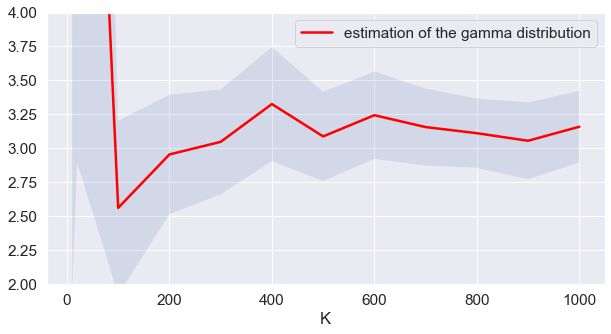

In [32]:
means, variances = butstrF(sample_gamma, method_of_moments_gamma)
f(means, variances, 'estimation of the gamma distribution')

Чем больше K, тем точнее оценка и меньше дисперсия. Оценка равномерного и нормального распределений сходится примерно одинакого хорошо, но у равномерного распределения дисперсия быстрее уменьшается.